In [1]:
import pandas as pd
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="ticks", font="Arial", font_scale=1.2)

In [3]:
def load_data(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

plot_type = "deltaE"
data_dir = "./output-data/color-task/all"
# add subfolder for this plot type if it doesn't exist
figure_dir = "./figures/color-task/" + plot_type + "/"
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

word_stats = load_data(f"{data_dir}/word-stats.pickle")
word_stats

,model_name,prompt,temperature,word,mean_L1,mean_A1,mean_B1,cov1,var_L1,var_A1,...,std_internalDeltaE,ci_lower_internalDeltaE,ci_upper_internalDeltaE,mean_populationDeltaE,count_populationDeltaE,std_populationDeltaE,ci_lower_populationDeltaE,ci_upper_populationDeltaE,dist_from_diagonal,jsd_with_human
0,human,na,na,absurdity,54.341506,7.350793,13.712747,"[[531.413981915455, -155.86382941669964, 152.9...",531.413982,864.385440,...,32.009724,47.388712,60.400187,64.947424,4278.0,26.219588,64.161715,65.733133,7.815633,0.000000
1,human,na,na,ache,44.448867,26.910118,24.018077,"[[359.28364834349327, -96.96122719176365, 21.5...",359.283648,836.009974,...,28.706060,26.161357,38.225599,57.224197,3741.0,28.719670,56.303871,58.144523,17.699391,0.000000
2,human,na,na,admiration,62.149260,10.291344,7.876079,"[[338.6232262959522, -244.4844425263056, 98.30...",338.623226,1249.507994,...,31.626451,38.471341,51.258457,64.399697,4371.0,28.069892,63.567537,65.231856,13.813188,0.000000
3,human,na,na,adoration,62.898140,16.217713,9.235513,"[[283.63720132465284, -237.7473534949923, 23.5...",283.637201,1381.155011,...,30.177088,27.393283,39.594397,61.515479,4371.0,29.209782,60.649527,62.381432,19.814291,0.000000
4,human,na,na,anxiety,50.001557,25.742799,20.804888,"[[443.0879436803875, -235.0486912278044, 164.0...",443.087944,989.737317,...,33.535060,33.479576,47.573293,64.058630,3741.0,29.605300,63.109923,65.007336,16.639775,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,tulu-dpo,random,default,weariness,62.668487,3.505422,2.612087,"[[410.273512637663, -58.554133143320364, -38.3...",410.273513,139.428816,...,24.552218,29.172362,37.921879,35.045518,7260.0,25.403241,34.461163,35.629873,1.059527,0.218217
1190,tulu-dpo,random,default,wilderness,53.193009,-27.151734,31.752684,"[[505.189354589422, -651.6524482632555, 500.20...",505.189355,1479.770087,...,37.106298,61.491439,74.248835,66.685448,8385.0,37.544884,65.881819,67.489076,0.837702,0.224502
1191,tulu-dpo,random,default,windmill,68.624038,0.505007,13.992970,"[[453.6760647938913, -201.69216875781282, 95.3...",453.676065,612.257046,...,33.136072,55.588411,67.446002,63.813605,7140.0,35.153487,62.998197,64.629014,1.623799,0.123567
1192,tulu-dpo,random,default,window,83.148260,-3.381698,0.796814,"[[555.2901121249379, -2.7837764186344294, 22.3...",555.290112,199.054475,...,28.787865,30.689169,40.624919,34.195170,8256.0,29.731341,33.553834,34.836506,1.033701,0.119426


In [24]:
# Get names of words with extreme values.
word_stats[
    (word_stats.model_name=="human") & \
    (word_stats.mean_populationDeltaE<20) & \
    (word_stats.mean_internalDeltaE<10)
]

,model_name,prompt,temperature,word,mean_L1,mean_A1,mean_B1,cov1,var_L1,var_A1,...,std_internalDeltaE,ci_lower_internalDeltaE,ci_upper_internalDeltaE,mean_populationDeltaE,count_populationDeltaE,std_populationDeltaE,ci_lower_populationDeltaE,ci_upper_populationDeltaE,dist_from_diagonal,jsd_with_human
25,human,na,na,chalk,86.362358,1.008685,0.755319,"[[199.58568148069548, 6.625618674915886, 8.239...",199.585681,78.130579,...,14.750774,4.035875,10.235155,15.792603,3741.0,21.536233,15.102471,16.482734,6.121485,0.0


In [26]:
word_stats[
    (word_stats.model_name=="human") & \
    (word_stats.mean_populationDeltaE>60) & \
    (word_stats.mean_internalDeltaE>55)
]

,model_name,prompt,temperature,word,mean_L1,mean_A1,mean_B1,cov1,var_L1,var_A1,...,std_internalDeltaE,ci_lower_internalDeltaE,ci_upper_internalDeltaE,mean_populationDeltaE,count_populationDeltaE,std_populationDeltaE,ci_lower_populationDeltaE,ci_upper_populationDeltaE,dist_from_diagonal,jsd_with_human
122,human,na,na,obligation,50.342951,2.338739,13.291483,"[[418.6950436017892, -96.77034772948481, 189.0...",418.695044,905.366951,...,34.432673,49.211065,63.132785,62.304725,4371.0,26.661261,61.514326,63.095124,4.336544,0.0


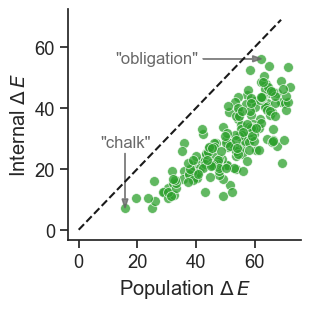

In [88]:
def plot_deltaE_human(df, annot=True):
    human_data = df[df.model_name=="human"]
    
    # Means
    ax = sns.scatterplot(
        data=human_data,
        x="mean_populationDeltaE", 
        y="mean_internalDeltaE",
        color="tab:green",
        s=50,
        alpha=0.75,
#         ec="k"
    )
    
    # Line of unity
    ax.plot(np.arange(0,70), np.arange(0,70), linestyle="--", color="k")
    
    # Axis labels
    ax.set_xlabel("Population $\\Delta \,E$")
    ax.set_ylabel("Internal $\\Delta \,E$")
    
    # Annotations
    if annot:
        w1, w2 = ["chalk", "obligation"]
        
        w1_data = human_data[human_data.word==w1].squeeze()
        x = w1_data["mean_populationDeltaE"]
        y = w1_data["mean_internalDeltaE"]
        ax.text(x, y+20, f'"{w1}"', size="small", color="dimgrey", ha="center")
        ax.arrow(x, y+18, 0, -18, width=0.001, length_includes_head=True, head_width=2, color="dimgrey", alpha=0.8)
        
        w2_data = human_data[human_data.word==w2].squeeze()
        x = w2_data["mean_populationDeltaE"]
        y = w2_data["mean_internalDeltaE"]
        ax.text(x-50, y, f'"{w2}"', size="small", color="dimgrey", va="center")
        ax.arrow(x-20, y, 20, 0, width=0.001, length_includes_head=True, head_width=2, color="dimgrey", alpha=0.8)
    
    # Aesthetics
    sns.despine()
    plt.gcf().set_size_inches(3,3)
    
plot_deltaE_human(word_stats, annot=True)
plt.savefig("figures/color-task/deltaE/human_baseline.pdf", bbox_inches="tight")

  0%|                                                                                                                                         | 0/4 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: './output-data/color-task/color-human.pickle'

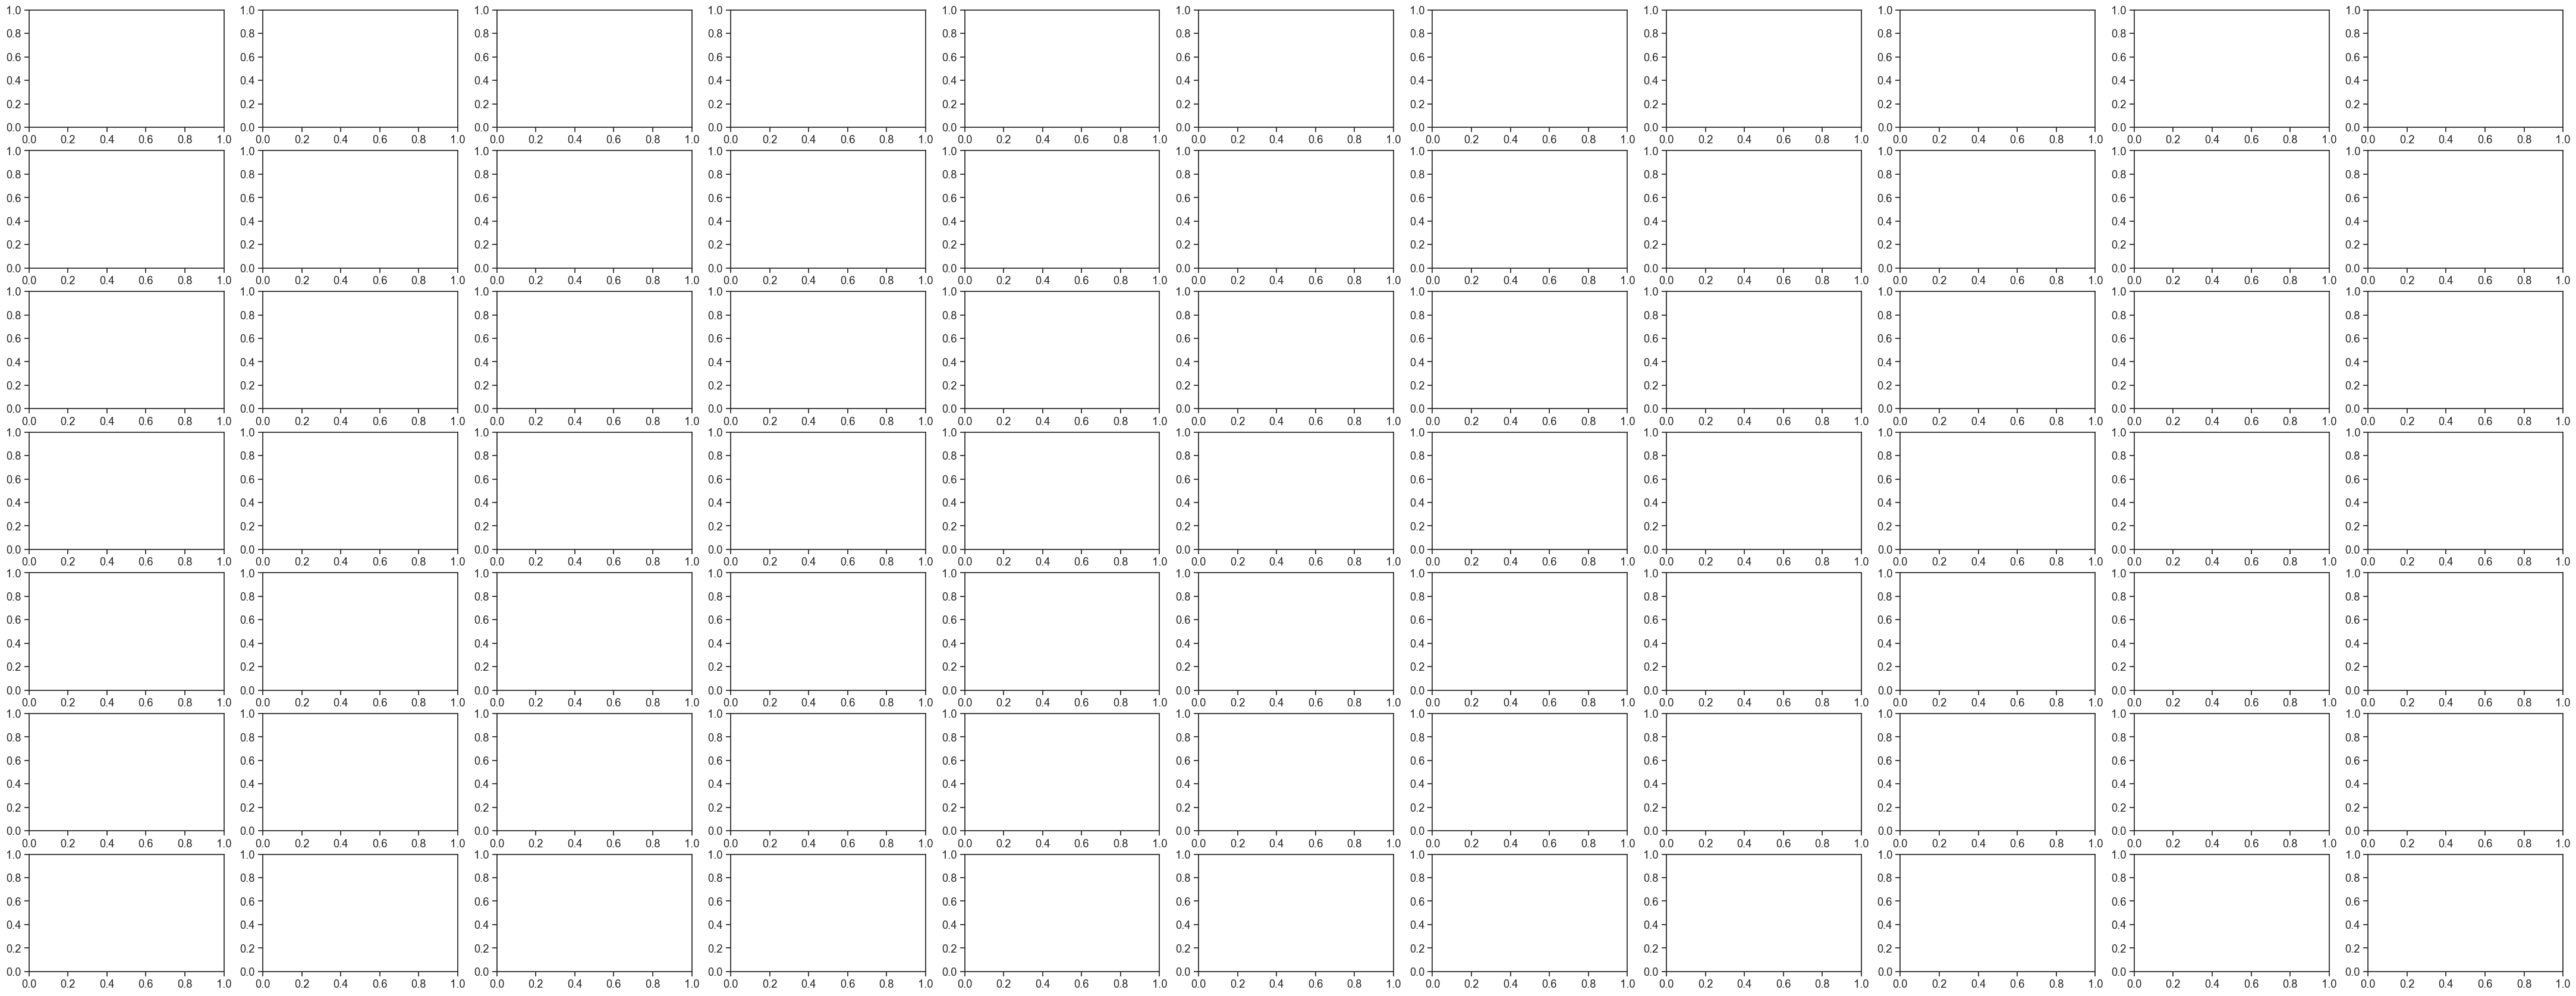

In [89]:
def plot_color_bars(df, models, words, figure_dir):
    temperature = "default"

    for prompt in tqdm(["none", "random", "nonsense", "identity"]):
        fig, axs = plt.subplots(len(words), len(models), figsize=(5*len(models),3*len(words)), frameon=False)
        
        for m_index, model_name in enumerate(models):
            # Load pickled data
            filename = f"color-{model_name}.pickle"
            output_path = "./output-data/color-task/" + filename

            df = pd.read_pickle(output_path)

            if model_name == "human":
                df_model = df[df['model_name'] == 'human']
            else:
                # select data for this model and prompt
                df_model = df[(df['model_name'] == model_name) & (df['prompt'] == prompt) & (df['temperature'] == temperature)]
                # remove -1 values
                df_model = df_model[df_model['rgb1'] != -1]

            # get all unique words
            model_words = df_model['word'].unique()

            for w_index, word in enumerate(words):
                axs[w_index][m_index].get_xaxis().set_ticks([])
                axs[w_index][m_index].get_yaxis().set_ticks([])
                # axs[w_index][m_index].set_ylabel(word, fontsize='medium', rotation='horizontal', ha='right')

                # get all responses for this word
                responses = df_model[df_model['word'] == word]
                rgb = responses['rgb1'].tolist()

                for i in range(len(rgb)):
                    # if rgb is not in range 0-1, scale it
                    if any (x > 1 for x in rgb[i]):
                        rgb[i] = [float(x)/255 for x in rgb[i]]
                    else:
                        rgb[i] = [float(x) for x in rgb[i]]

                # step sort the non-greyscale colors
                rgb.sort(key=lambda rgb: stepSort(rgb[0], rgb[1], rgb[2], 8))

                #--------------------------------------------
                # make plots
                x = 0
                y = 0
                w = 0.0075
                h = 1
                c = 0

                # uncomment for dynamic width based on number of responses
                num_responses = len(rgb)
                w = 1.0 / max(num_responses, 1)

                if word not in model_words:
                    while x < 1:
                        pos = (x, y)
                        axs[w_index][m_index].add_patch(patches.Rectangle(pos, w, h, hatch='xx',fill=False, linewidth=0))
                        x += w
                    continue

                # iterate over percentage values for this word
                # X percent of the bar should be of color associated with that button response
                for color in rgb:
                    pos = (x, y)
                    axs[w_index][m_index].add_patch(patches.Rectangle(pos, w, h, color=color, linewidth=0))
                    # increment to next color in rgb array
                    c += 1

                    # start next block at previous x + width of rectangle this rectangle
                    x += w

                # # fill in the rest of the bar with transparent rectangles
                # while x < 1:
                #     pos = (x, y)
                #     axs[w_index][m_index].add_patch(patches.Rectangle(pos, w, h, hatch='xx',fill=False, linewidth=0))
                #     x += w

                
        for ax, col in zip(axs[0], models):
            ax.set_title(col, fontsize=12)
        for ax, row in zip(axs[:,0], words):
            ax.set_ylabel(row, rotation=0, size='large', ha='right')

#         plt.savefig(f'{figure_dir}/colorbars-{prompt}.pdf' ,bbox_inches='tight',dpi=300)
        plt.clf()

models = ["human", "openchat", "starling", "gemma-instruct", "zephyr-gemma", "mistral-instruct", "zephyr-mistral", "llama2", "llama2-chat", "tulu", "tulu-dpo"]
words = ["skin", "optimism", "freedom", "butterfly", "tomato", "jealousy", "fame"]
plot_color_bars(word_stats, models, words, figure_dir)